In [64]:
import numpy as np
import pandas as pd

In [65]:
dfOriginal = pd.read_json('ecommerce-events.ndjson', lines = True)

In [66]:
bolTrans = (dfOriginal.eventType == 'transaction')

In [67]:
dfTrans = dfOriginal[bolTrans]

In [99]:
bolCamp2 = (dfOriginal.utm_campaign == 'Campaign_2') & (dfOriginal.eventType == 'product')

In [100]:
dfCamp2 = dfOriginal[bolCamp2]

In [161]:
def returnCategory(prod):
    return dfCamp2[dfCamp2['product'] == prod]['category'].iloc(0)[0]

In [181]:
orders = dfTrans.orderItems

lista = orders.iloc(0)[0:]

sum = 0
i = 0

listCateg = []

while i < len(lista):
    j = 0
    listaOrder = orders.iloc(0)[i]
    while j < len(listaOrder):
        sum = sum + (orders.iloc(0)[i][j]['price'] * orders.iloc(0)[i][j]['quantity'])
        prod = orders.iloc(0)[i][j]['product']
        linha = []
        linha.append(orders.iloc(0)[i][j]['product'])
        
        #linha.append(dfCamp2[dfCamp2['product'] == prod]['category'])
        linha.append(orders.iloc(0)[i][j]['price'] * orders.iloc(0)[i][j]['quantity'])
        listCateg.append(linha)
        j = j + 1
    i = i + 1

print(sum)

212022.26999999894


In [327]:
dfTranProd = pd.DataFrame(listCateg, columns='product value'.split())

In [199]:
def strProduct(prod):
    return str(int(prod))

In [200]:
dfCamp2['productStr'] = dfCamp2['product'].apply(strProduct)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [328]:
dfTranProd['productStr'] = dfTranProd['product'].apply(strProduct)

In [296]:
groupCamp2 = dfCamp2.groupby(['productStr','category'])
dfProdUnique = pd.DataFrame(groupCamp2.size().reset_index())


'756|268|188'

In [322]:
def returnCategory(prod):
    cat = dfProdUnique[dfProdUnique['productStr'] == prod]['category']
    return cat

In [330]:
dfUnion = pd.merge(dfTranProd, dfProdUnique, on=['productStr'])

In [333]:
groupSum = dfUnion.groupby('category')

In [342]:
dfSumCat = pd.DataFrame(groupSum['value'].sum().reset_index())

In [353]:
dfSumCat.sort_values(by='value',ascending=False,inplace=True)

In [354]:
dfSumCat

,category,value
13,271|308,33924.61
16,271|697,31541.69
12,271|300,23800.39
42,322|173|759,11052.17
81,756|763|181,10822.72
2,234|725,7500.35
53,53|329|506,6697.37
29,319|689|244,6649.63
44,349|215,4223.81
45,349|215|628,3327.03


In [341]:
import seaborn as sns
%matplotlib inline

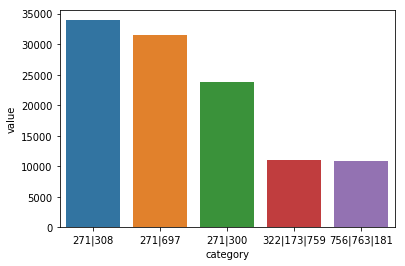

In [355]:
sns.barplot(x='category',y='value',data=dfSumCat.head())